In [1]:
import pandas as pd  # panda lib

# upload CSV
df = pd.read_csv("eu_sdg_performance_data.csv")

# first 5 rows
df.head()

,Country,year,sdgi_score,performance_tier,sdg8_income,sdg8_unemp,sdg8_inwork,sdg9_eurd,sdg9_digital,sdg9_bband,sdg16_cpi,sdg16_rsf,sdg16_crime,sdg4_tertiary,sdg4_adult,sdg7_eurenew,sdg13_co2gcp,sdg5_empgap,sdg10_gini
0,Austria,2015,75.3,2,25106.0,6.0,8,3,63.0,82,76,89,13,39,14,33.0,7.73,8.0,27
1,Austria,2016,75.8,2,25533.0,7.0,8,3,63.0,85,75,87,12,40,15,33.0,7.73,8.0,27
2,Austria,2017,76.2,2,25788.0,6.0,8,3,63.0,89,75,87,11,40,16,33.0,7.93,8.0,28
3,Austria,2018,77.0,2,26442.0,5.0,8,3,63.0,89,76,86,10,41,15,34.0,7.55,9.0,27
4,Austria,2019,77.7,2,26740.0,5.0,8,3,63.0,90,77,85,8,42,15,34.0,7.67,9.0,28


In [2]:
# how many
df.shape


(420, 19)

In [3]:
df.columns

Index(['Country', 'year', 'sdgi_score', 'performance_tier', 'sdg8_income',
       'sdg8_unemp', 'sdg8_inwork', 'sdg9_eurd', 'sdg9_digital', 'sdg9_bband',
       'sdg16_cpi', 'sdg16_rsf', 'sdg16_crime', 'sdg4_tertiary', 'sdg4_adult',
       'sdg7_eurenew', 'sdg13_co2gcp', 'sdg5_empgap', 'sdg10_gini'],
      dtype='object')

In [4]:
# datatypes
df.dtypes

Country              object
year                  int64
sdgi_score          float64
performance_tier      int64
sdg8_income         float64
sdg8_unemp          float64
sdg8_inwork           int64
sdg9_eurd             int64
sdg9_digital        float64
sdg9_bband            int64
sdg16_cpi             int64
sdg16_rsf             int64
sdg16_crime           int64
sdg4_tertiary         int64
sdg4_adult            int64
sdg7_eurenew        float64
sdg13_co2gcp        float64
sdg5_empgap         float64
sdg10_gini            int64
dtype: object

In [5]:
# counting missing values
df.isna().sum()


Country              0
year                 0
sdgi_score           0
performance_tier     0
sdg8_income         10
sdg8_unemp          10
sdg8_inwork          0
sdg9_eurd            0
sdg9_digital        10
sdg9_bband           0
sdg16_cpi            0
sdg16_rsf            0
sdg16_crime          0
sdg4_tertiary        0
sdg4_adult           0
sdg7_eurenew        30
sdg13_co2gcp         0
sdg5_empgap         10
sdg10_gini           0
dtype: int64

In [6]:
# Drop rows with missing values
df_clean = df.dropna()

In [7]:
# counting missing values
df_clean.isna().sum()

Country             0
year                0
sdgi_score          0
performance_tier    0
sdg8_income         0
sdg8_unemp          0
sdg8_inwork         0
sdg9_eurd           0
sdg9_digital        0
sdg9_bband          0
sdg16_cpi           0
sdg16_rsf           0
sdg16_crime         0
sdg4_tertiary       0
sdg4_adult          0
sdg7_eurenew        0
sdg13_co2gcp        0
sdg5_empgap         0
sdg10_gini          0
dtype: int64

In [8]:
#classes and number of performance_tier
df_clean['performance_tier'].value_counts()

performance_tier
1    255
0     63
2     62
Name: count, dtype: int64

Text(0, 0.5, 'Number of Observations')

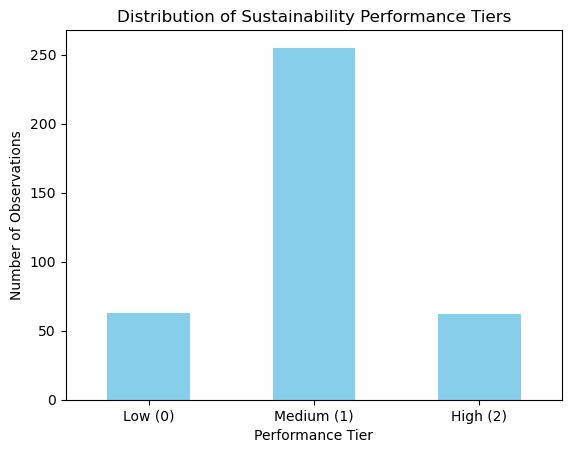

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create bar chart of performance tiers
ax = df_clean['performance_tier'].value_counts().sort_index().plot(kind='bar', color='skyblue')

# Customize x-axis labels
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Low (0)', 'Medium (1)', 'High (2)'], rotation=0)

# Add titles and labels 
plt.title("Distribution of Sustainability Performance Tiers")
plt.xlabel("Performance Tier")
plt.ylabel("Number of Observations")



In [10]:
# Select all numeric features except the target
features = df_clean.drop(columns=['performance_tier']).select_dtypes(include='number').columns.tolist()

# Calculate correlations with the target variable
correlations = df_clean[features].corrwith(df['performance_tier']).sort_values(ascending=False)

# Display results
print("Correlation of each feature with performance_tier:")
print(correlations)

Correlation of each feature with performance_tier:
sdgi_score       0.897153
sdg16_cpi        0.725006
sdg4_adult       0.670361
sdg9_eurd        0.664309
sdg9_digital     0.659274
sdg16_rsf        0.628124
sdg8_income      0.547186
sdg9_bband       0.528698
sdg7_eurenew     0.403788
sdg4_tertiary    0.225296
year             0.095049
sdg13_co2gcp     0.062060
sdg16_crime     -0.230893
sdg8_unemp      -0.274761
sdg8_inwork     -0.467026
sdg5_empgap     -0.467617
sdg10_gini      -0.536518
dtype: float64


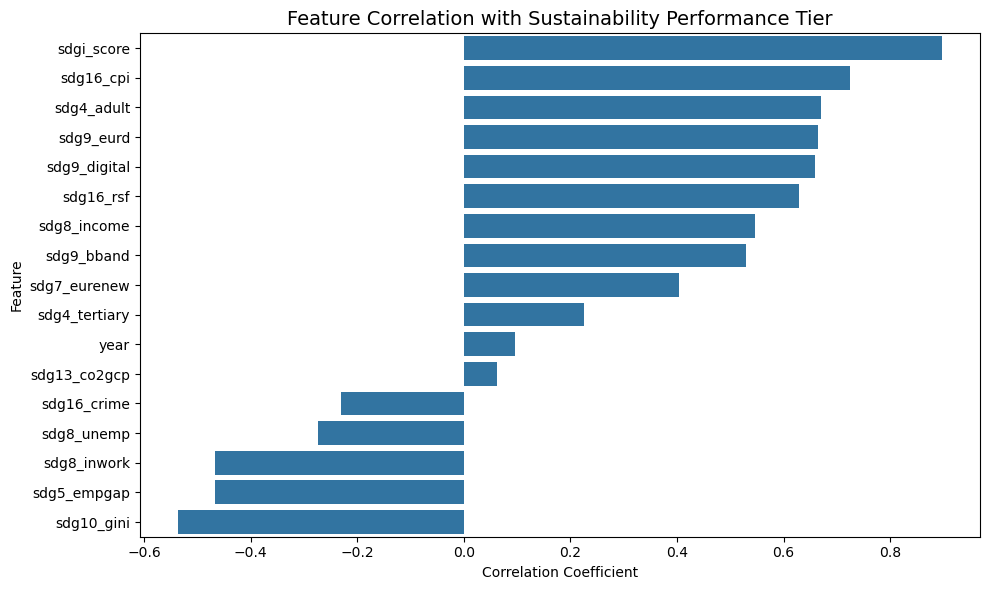

In [11]:
# Barplot of correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.values, y=correlations.index)
plt.title("Feature Correlation with Sustainability Performance Tier", fontsize=14)
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

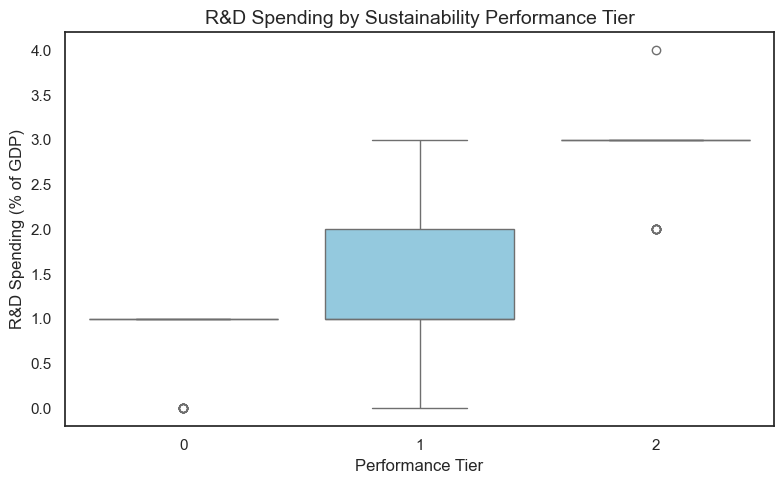

In [12]:


# set up plot style 
sns.set(style="white")

plt.figure(figsize=(8, 5))

# draw boxplot - R&D spending / tiers
sns.boxplot(x='performance_tier', y='sdg9_eurd', data=df_clean, color='skyblue')

plt.title("R&D Spending by Sustainability Performance Tier", fontsize=14)
plt.xlabel("Performance Tier", fontsize=12)
plt.ylabel("R&D Spending (% of GDP)", fontsize=12)

# make sure layout doesn't get messy
plt.tight_layout()
plt.show()

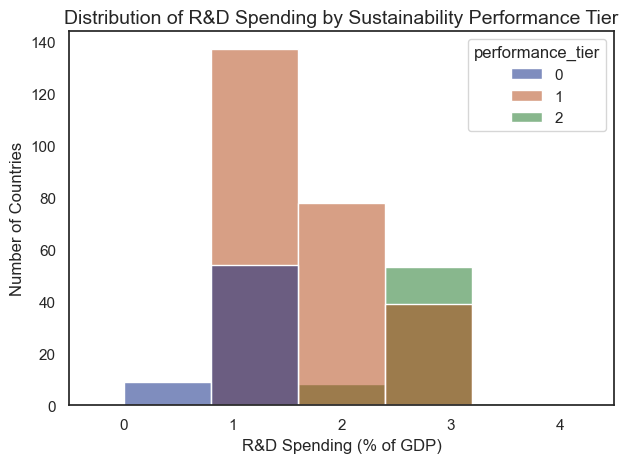

In [13]:
sns.set(style="white")

# make a histogram
sns.histplot(
    data=df_clean,
    x='sdg9_eurd',
    hue='performance_tier',
    palette='dark',
    bins=5,
    edgecolor='white'
)

# titles labels
plt.title("Distribution of R&D Spending by Sustainability Performance Tier", fontsize=14)
plt.xlabel("R&D Spending (% of GDP)", fontsize=12)
plt.ylabel("Number of Countries", fontsize=12)

# ticks
plt.xticks([0, 1, 2, 3, 4])
plt.xlim(-0.5, 4.5)

plt.grid(False)
plt.tight_layout()
plt.show()

In [14]:
df_clean.groupby('performance_tier')['sdg9_eurd'].describe()


,count,mean,std,min,25%,50%,75%,max
performance_tier,,,,,,,,
0,63.0,0.857143,0.352738,0.0,1.0,1.0,1.0,1.0
1,255.0,1.607843,0.744492,0.0,1.0,1.0,2.0,3.0
2,62.0,2.887097,0.366858,2.0,3.0,3.0,3.0,4.0


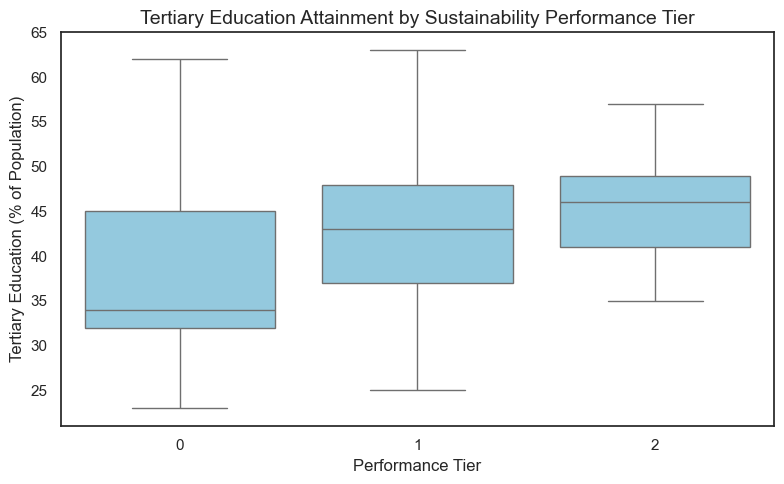

In [15]:
# set up the plot style — clean visuals, nothing fancy
sns.set(style="white")

plt.figure(figsize=(8, 5))

# draw boxplot - tertiary education levels/tiers
sns.boxplot(x='performance_tier', y='sdg4_tertiary', data=df_clean, color='skyblue')

# official-style title and axis labels
plt.title("Tertiary Education Attainment by Sustainability Performance Tier", fontsize=14)
plt.xlabel("Performance Tier", fontsize=12)
plt.ylabel("Tertiary Education (% of Population)", fontsize=12)

# make sure layout doesn't get messy
plt.tight_layout()
plt.show()

In [16]:
df_clean.groupby('performance_tier')['sdg4_tertiary'].describe()


,count,mean,std,min,25%,50%,75%,max
performance_tier,,,,,,,,
0,63.0,38.730159,11.747623,23.0,32.0,34.0,45.0,62.0
1,255.0,42.913725,8.092989,25.0,37.0,43.0,48.0,63.0
2,62.0,45.500000,5.130270,35.0,41.0,46.0,49.0,57.0


Text(0, 0.5, 'Number of Observations')

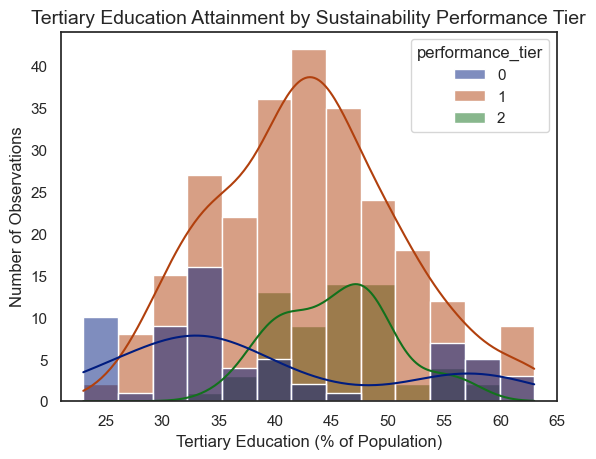

In [17]:
sns.set(style="white")

sns.histplot(data=df_clean, x='sdg4_tertiary', hue='performance_tier', kde=True, palette='dark')
plt.title("Tertiary Education Attainment by Sustainability Performance Tier", fontsize=14)
plt.xlabel("Tertiary Education (% of Population)", fontsize=12)
plt.ylabel("Number of Observations", fontsize=12)

In [18]:
df_clean.groupby('performance_tier')['sdg7_eurenew'].describe()

,count,mean,std,min,25%,50%,75%,max
performance_tier,,,,,,,,
0,63.0,21.841270,5.548049,5.0,19.0,23.0,25.00,32.0
1,255.0,25.027451,17.546654,5.0,15.0,19.0,30.00,84.0
2,62.0,47.080645,15.036893,19.0,35.5,44.5,55.75,77.0


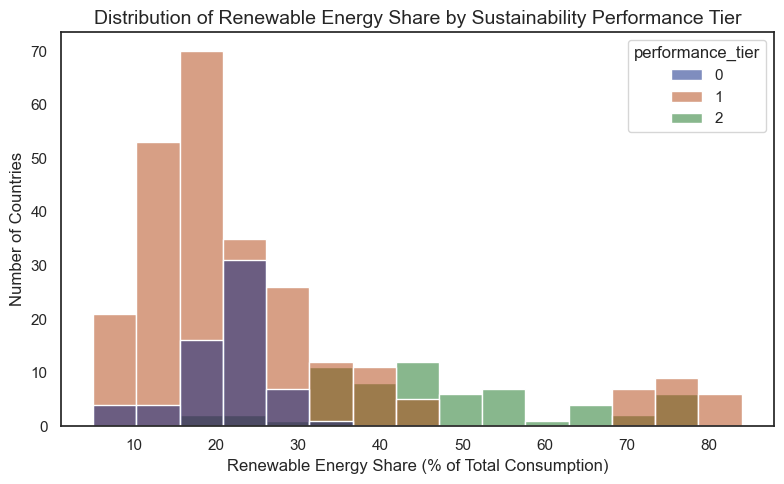

In [19]:
sns.set(style="white")

plt.figure(figsize=(8, 5))

# hist because the feature is continuous, not discrete.
sns.histplot(
    data=df_clean,
    x='sdg7_eurenew',
    hue='performance_tier',
    palette='dark',
    bins=15,
    edgecolor='white'
)

plt.title("Distribution of Renewable Energy Share by Sustainability Performance Tier", fontsize=14)
plt.xlabel("Renewable Energy Share (% of Total Consumption)", fontsize=12)
plt.ylabel("Number of Countries", fontsize=12)

plt.tight_layout()
plt.show()

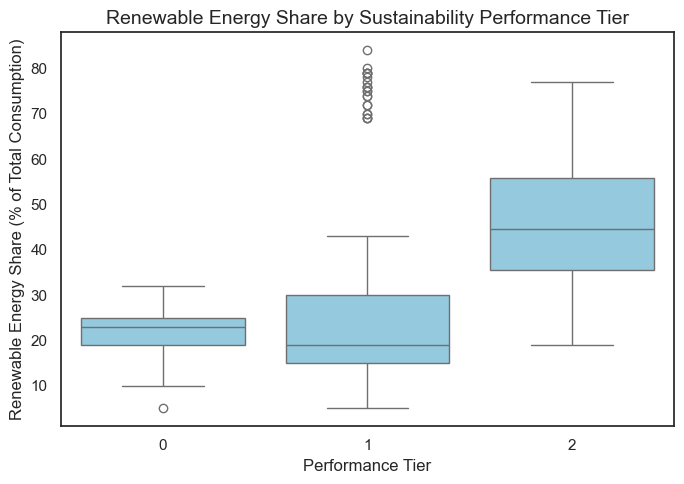

In [20]:
plt.figure(figsize=(7, 5))

sns.boxplot(
    data=df_clean,
    x='performance_tier',
    y='sdg7_eurenew',
    color='skyblue'
)

plt.title("Renewable Energy Share by Sustainability Performance Tier", fontsize=14)
plt.xlabel("Performance Tier", fontsize=12)
plt.ylabel("Renewable Energy Share (% of Total Consumption)", fontsize=12)

plt.tight_layout()
plt.show()

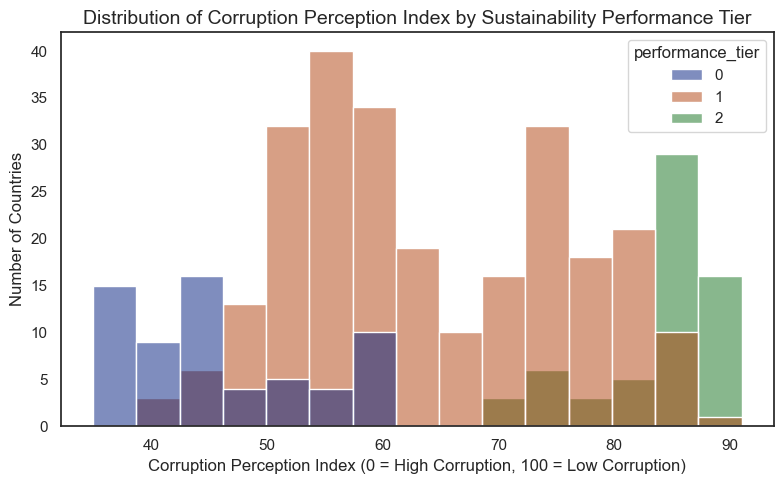

In [21]:
sns.set(style="white")

plt.figure(figsize=(8, 5))

sns.histplot(
    data=df_clean,
    x='sdg16_cpi',
    hue='performance_tier',
    palette='dark',
    bins=15,
    edgecolor='white'
)

plt.title("Distribution of Corruption Perception Index by Sustainability Performance Tier", fontsize=14)
plt.xlabel("Corruption Perception Index (0 = High Corruption, 100 = Low Corruption)", fontsize=12)
plt.ylabel("Number of Countries", fontsize=12)

plt.tight_layout()
plt.show()

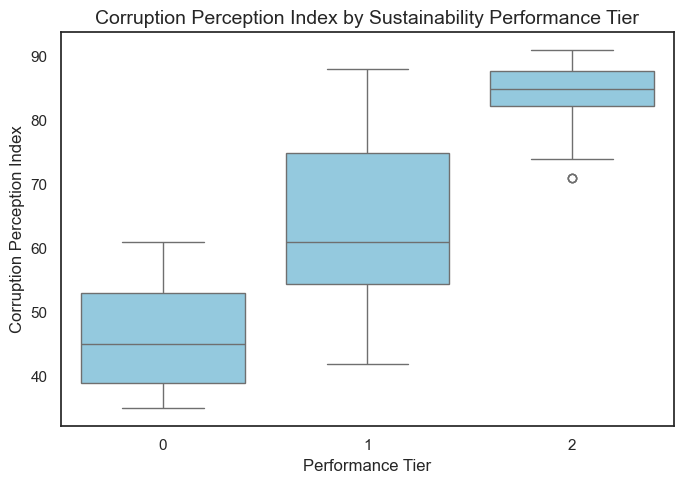

In [22]:
plt.figure(figsize=(7, 5))

sns.boxplot(
    data=df_clean,
    x='performance_tier',
    y='sdg16_cpi',
    color="skyblue"
)

plt.title("Corruption Perception Index by Sustainability Performance Tier", fontsize=14)
plt.xlabel("Performance Tier", fontsize=12)
plt.ylabel("Corruption Perception Index", fontsize=12)

plt.tight_layout()
plt.show()

In [23]:
df_clean.groupby('performance_tier')['sdg16_cpi'].describe()

,count,mean,std,min,25%,50%,75%,max
performance_tier,,,,,,,,
0,63.0,46.079365,8.084836,35.0,39.00,45.0,53.00,61.0
1,255.0,64.003922,11.681973,42.0,54.50,61.0,75.00,88.0
2,62.0,83.951613,5.161101,71.0,82.25,85.0,87.75,91.0


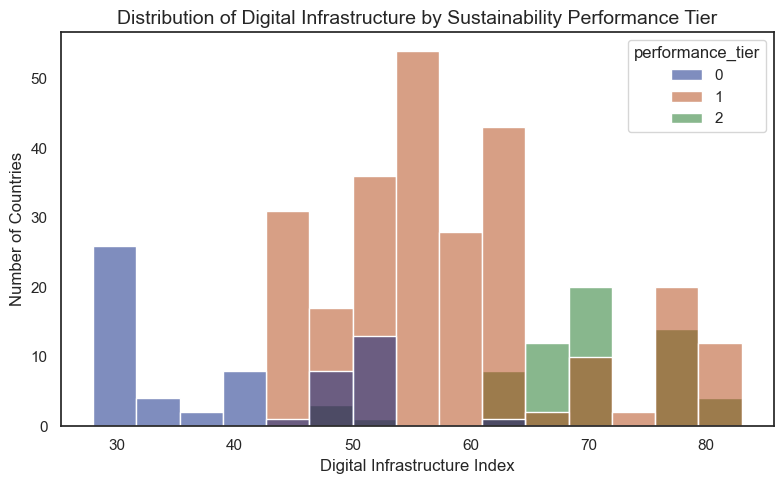

In [24]:
sns.set(style="white")

plt.figure(figsize=(8, 5))
sns.histplot(data=df_clean, x='sdg9_digital', hue='performance_tier', bins=15, palette='dark', edgecolor='white')

plt.title("Distribution of Digital Infrastructure by Sustainability Performance Tier", fontsize=14)
plt.xlabel("Digital Infrastructure Index")
plt.ylabel("Number of Countries")
plt.tight_layout()
plt.show()

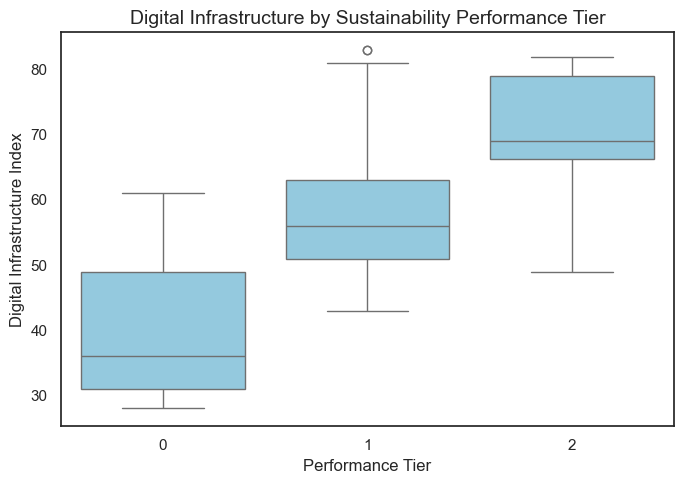

In [25]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=df_clean, x='performance_tier', y='sdg9_digital', color="skyblue")

plt.title("Digital Infrastructure by Sustainability Performance Tier", fontsize=14)
plt.xlabel("Performance Tier")
plt.ylabel("Digital Infrastructure Index")
plt.tight_layout()
plt.show()


In [26]:
df_clean.groupby('performance_tier')['sdg9_digital'].describe()

,count,mean,std,min,25%,50%,75%,max
performance_tier,,,,,,,,
0,63.0,39.126984,9.412572,28.0,31.00,36.0,49.0,61.0
1,255.0,58.380392,10.438440,43.0,51.00,56.0,63.0,83.0
2,62.0,69.790323,7.959193,49.0,66.25,69.0,79.0,82.0


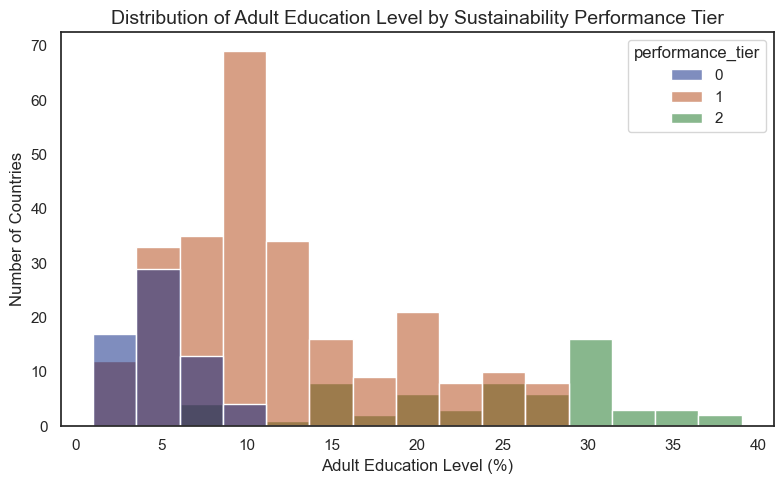

In [27]:
sns.set(style="white")

plt.figure(figsize=(8, 5))
sns.histplot(data=df_clean, x='sdg4_adult', hue='performance_tier', bins=15, palette='dark', edgecolor='white')

plt.title("Distribution of Adult Education Level by Sustainability Performance Tier", fontsize=14)
plt.xlabel("Adult Education Level (%)")
plt.ylabel("Number of Countries")
plt.tight_layout()
plt.show()


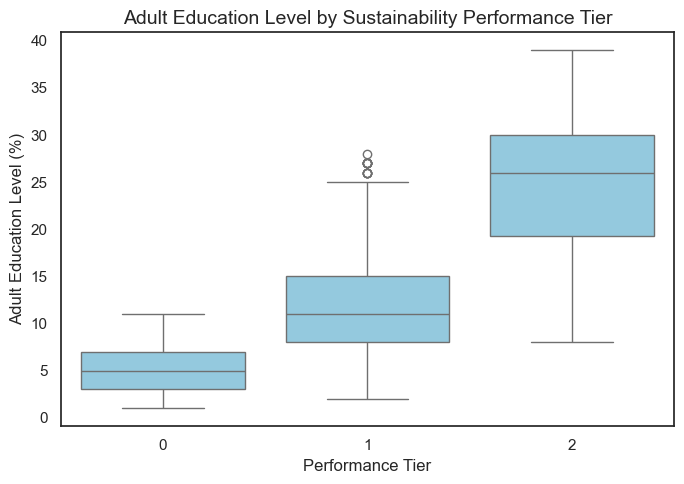

In [28]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=df_clean, x='performance_tier', y='sdg4_adult', color="skyblue")

plt.title("Adult Education Level by Sustainability Performance Tier", fontsize=14)
plt.xlabel("Performance Tier")
plt.ylabel("Adult Education Level (%)")
plt.tight_layout()
plt.show()

In [29]:
df_clean.groupby('performance_tier')['sdg4_adult'].describe()

,count,mean,std,min,25%,50%,75%,max
performance_tier,,,,,,,,
0,63.0,4.952381,2.555377,1.0,3.00,5.0,7.0,11.0
1,255.0,11.960784,6.194234,2.0,8.00,11.0,15.0,28.0
2,62.0,24.419355,7.780911,8.0,19.25,26.0,30.0,39.0


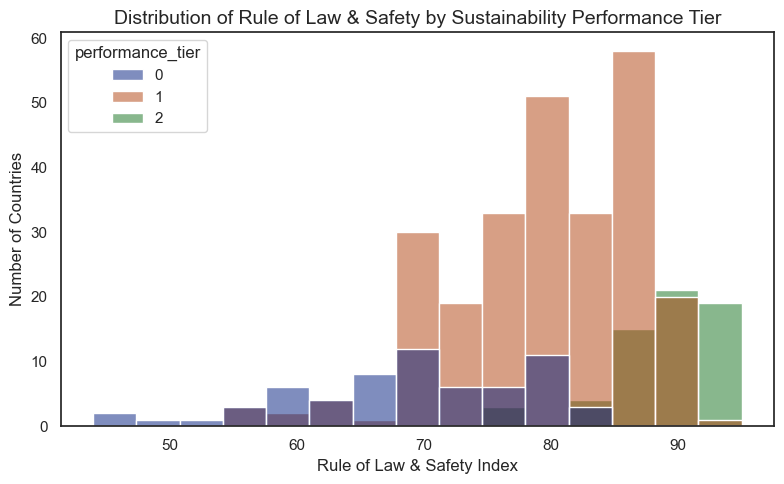

In [30]:
sns.set(style="white")

plt.figure(figsize=(8, 5))
sns.histplot(data=df_clean, x='sdg16_rsf', hue='performance_tier', bins=15, palette='dark', edgecolor='white')

plt.title("Distribution of Rule of Law & Safety by Sustainability Performance Tier", fontsize=14)
plt.xlabel("Rule of Law & Safety Index")
plt.ylabel("Number of Countries")
plt.tight_layout()
plt.show()


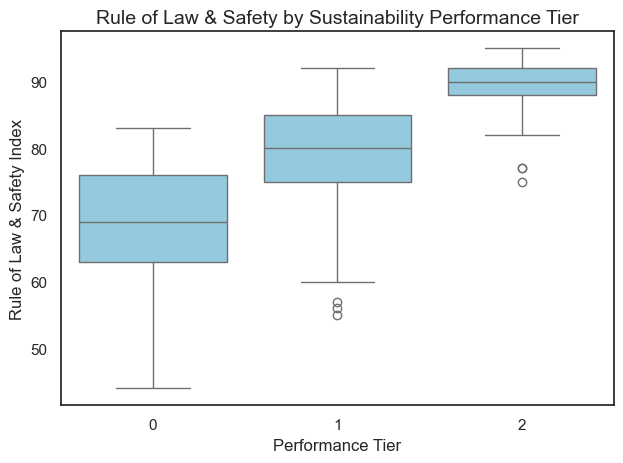

In [31]:
sns.boxplot(data=df_clean, x='performance_tier', y='sdg16_rsf', color="skyblue")
plt.title("Rule of Law & Safety by Sustainability Performance Tier", fontsize=14)
plt.xlabel("Performance Tier")
plt.ylabel("Rule of Law & Safety Index")
plt.tight_layout()
plt.show()

In [32]:
df_clean.groupby('performance_tier')['sdg16_rsf'].describe()

,count,mean,std,min,25%,50%,75%,max
performance_tier,,,,,,,,
0,63.0,68.777778,9.227316,44.0,63.0,69.0,76.0,83.0
1,255.0,79.568627,7.277554,55.0,75.0,80.0,85.0,92.0
2,62.0,89.048387,3.948137,75.0,88.0,90.0,92.0,95.0


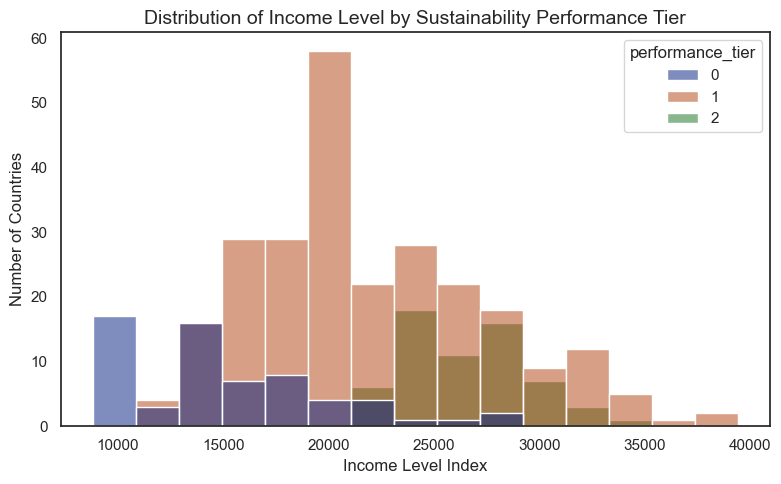

In [33]:
sns.set(style="white")

plt.figure(figsize=(8, 5))
sns.histplot(data=df_clean, x='sdg8_income', hue='performance_tier', bins=15, palette='dark', edgecolor='white')

plt.title("Distribution of Income Level by Sustainability Performance Tier", fontsize=14)
plt.xlabel("Income Level Index")
plt.ylabel("Number of Countries")
plt.tight_layout()
plt.show()


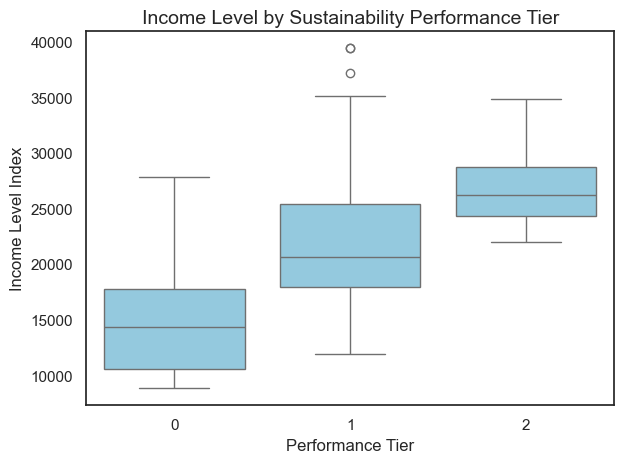

In [34]:
sns.boxplot(data=df_clean, x='performance_tier', y='sdg8_income', color="skyblue")

plt.title("Income Level by Sustainability Performance Tier", fontsize=14)
plt.xlabel("Performance Tier")
plt.ylabel("Income Level Index")
plt.tight_layout()
plt.show()

In [35]:
df_clean.groupby('performance_tier')['sdg16_rsf'].describe()

,count,mean,std,min,25%,50%,75%,max
performance_tier,,,,,,,,
0,63.0,68.777778,9.227316,44.0,63.0,69.0,76.0,83.0
1,255.0,79.568627,7.277554,55.0,75.0,80.0,85.0,92.0
2,62.0,89.048387,3.948137,75.0,88.0,90.0,92.0,95.0


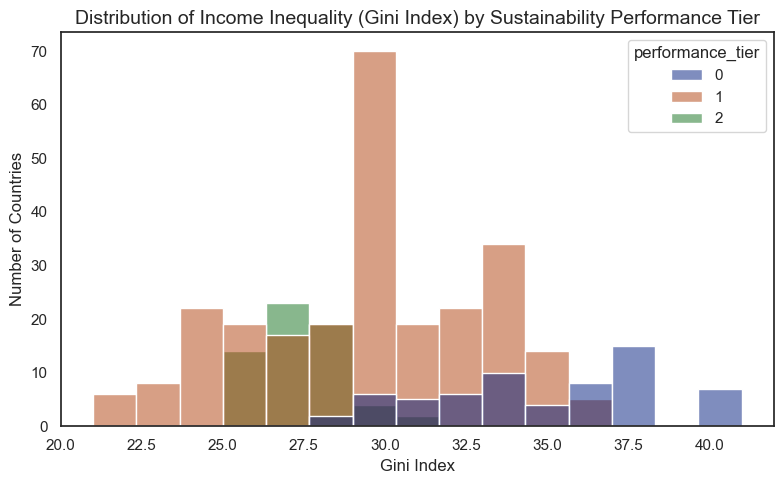

In [36]:
sns.set(style="white")

plt.figure(figsize=(8, 5))
sns.histplot(data=df_clean, x='sdg10_gini', hue='performance_tier', bins=15, palette='dark', edgecolor='white')

plt.title("Distribution of Income Inequality (Gini Index) by Sustainability Performance Tier", fontsize=14)
plt.xlabel("Gini Index")
plt.ylabel("Number of Countries")
plt.tight_layout()
plt.show()


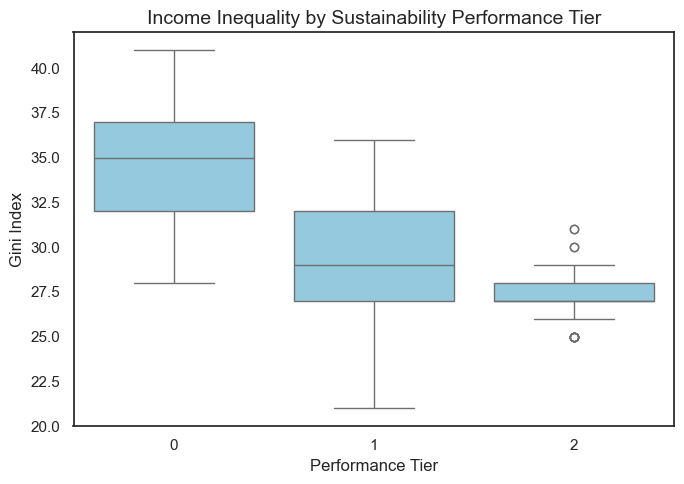

In [37]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=df_clean, x='performance_tier', y='sdg10_gini', color="skyblue")

plt.title("Income Inequality by Sustainability Performance Tier", fontsize=14)
plt.xlabel("Performance Tier")
plt.ylabel("Gini Index")
plt.tight_layout()
plt.show()

In [38]:
df_clean.groupby('performance_tier')['sdg16_rsf'].describe()

,count,mean,std,min,25%,50%,75%,max
performance_tier,,,,,,,,
0,63.0,68.777778,9.227316,44.0,63.0,69.0,76.0,83.0
1,255.0,79.568627,7.277554,55.0,75.0,80.0,85.0,92.0
2,62.0,89.048387,3.948137,75.0,88.0,90.0,92.0,95.0


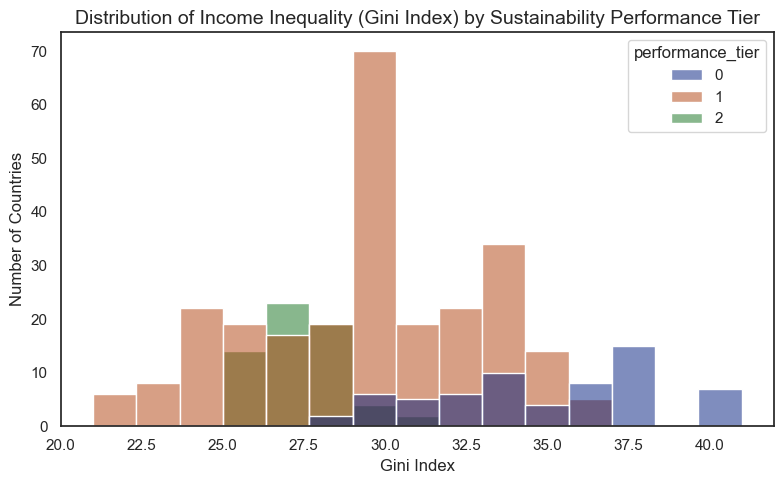

In [39]:
sns.set(style="white")

plt.figure(figsize=(8, 5))
sns.histplot(data=df_clean, x='sdg10_gini', hue='performance_tier', bins=15, palette='dark', edgecolor='white')

plt.title("Distribution of Income Inequality (Gini Index) by Sustainability Performance Tier", fontsize=14)
plt.xlabel("Gini Index")
plt.ylabel("Number of Countries")
plt.tight_layout()
plt.show()

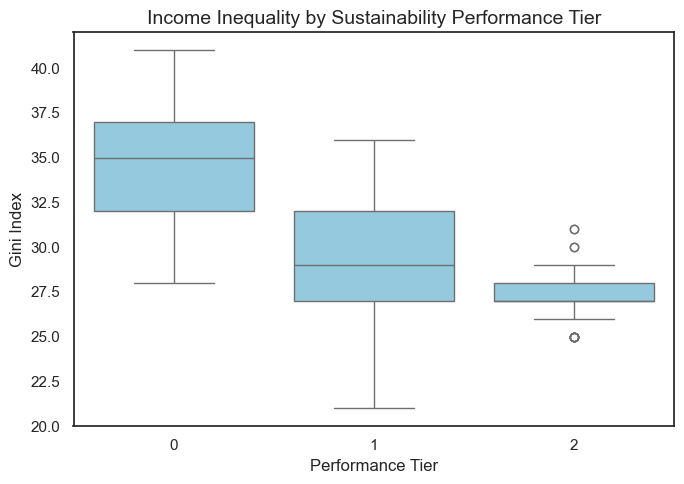

In [40]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=df_clean, x='performance_tier', y='sdg10_gini', color='skyblue')

plt.title("Income Inequality by Sustainability Performance Tier", fontsize=14)
plt.xlabel("Performance Tier")
plt.ylabel("Gini Index")
plt.tight_layout()
plt.show()

In [41]:
df_clean.groupby('performance_tier')['sdg10_gini'].describe()

,count,mean,std,min,25%,50%,75%,max
performance_tier,,,,,,,,
0,63.0,34.682540,3.439924,28.0,32.0,35.0,37.0,41.0
1,255.0,29.309804,3.564107,21.0,27.0,29.0,32.0,36.0
2,62.0,27.241935,1.351204,25.0,27.0,27.0,28.0,31.0


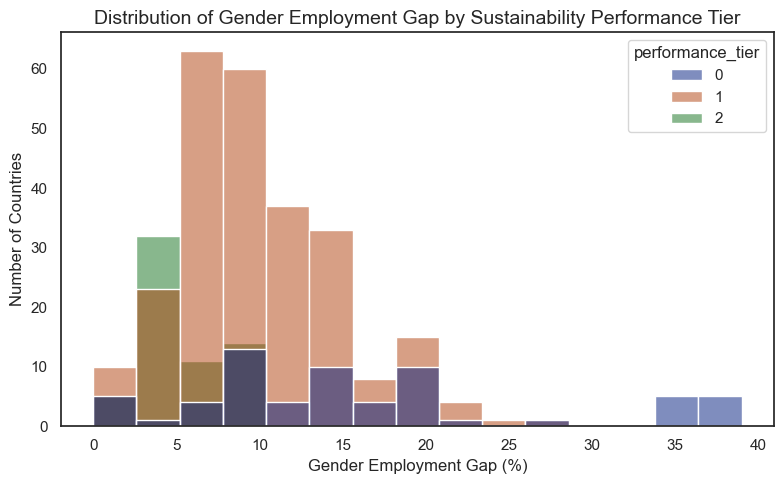

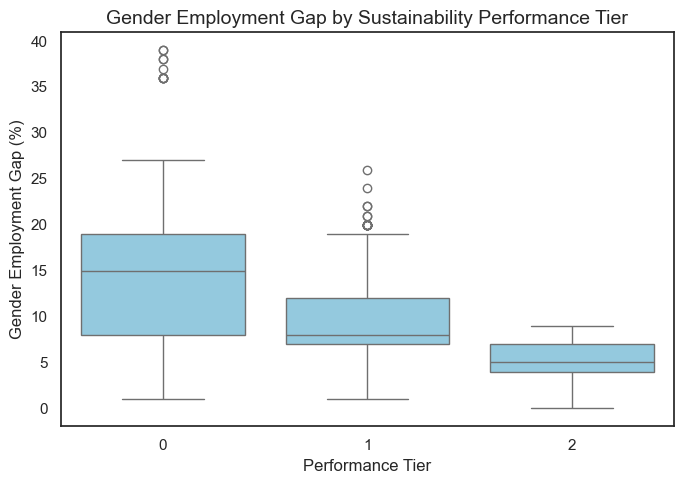

In [42]:
sns.set(style="white")

plt.figure(figsize=(8, 5))
sns.histplot(data=df_clean, x='sdg5_empgap', hue='performance_tier', bins=15, palette='dark', edgecolor='white')

plt.title("Distribution of Gender Employment Gap by Sustainability Performance Tier", fontsize=14)
plt.xlabel("Gender Employment Gap (%)")
plt.ylabel("Number of Countries")
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 5))
sns.boxplot(data=df_clean, x='performance_tier', y='sdg5_empgap', color='skyblue')

plt.title("Gender Employment Gap by Sustainability Performance Tier", fontsize=14)
plt.xlabel("Performance Tier")
plt.ylabel("Gender Employment Gap (%)")
plt.tight_layout()
plt.show()

In [43]:
df_clean.groupby('performance_tier')['sdg5_empgap'].describe()

,count,mean,std,min,25%,50%,75%,max
performance_tier,,,,,,,,
0,63.0,16.285714,10.652016,1.0,8.0,15.0,19.0,39.0
1,255.0,9.764706,4.826062,1.0,7.0,8.0,12.0,26.0
2,62.0,5.370968,2.159492,0.0,4.0,5.0,7.0,9.0


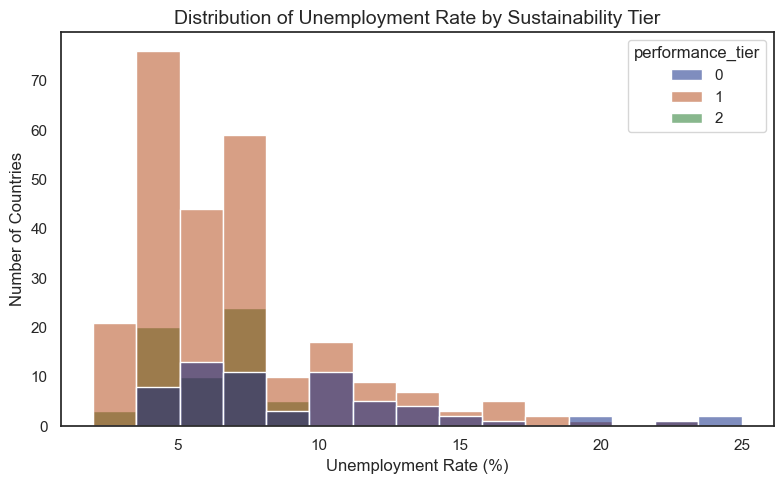

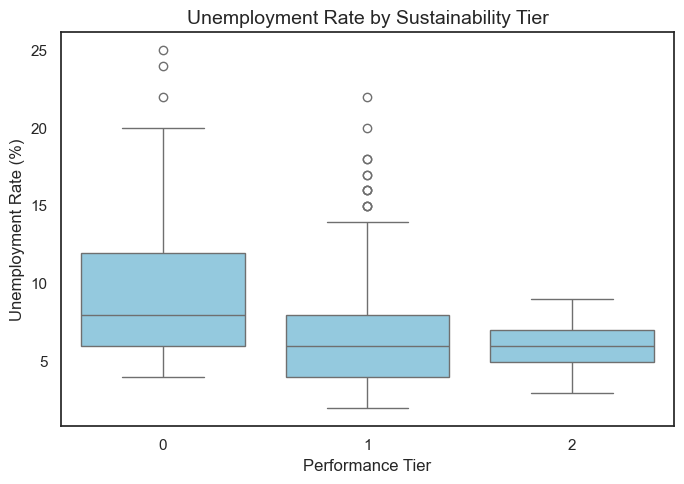

,count,mean,std,min,25%,50%,75%,max
performance_tier,,,,,,,,
0,63.0,9.666667,4.802553,4.0,6.0,8.0,12.0,25.0
1,255.0,6.905882,3.413579,2.0,4.0,6.0,8.0,22.0
2,62.0,6.193548,1.657954,3.0,5.0,6.0,7.0,9.0


In [44]:
# Histogram
plt.figure(figsize=(8, 5))
sns.histplot(data=df_clean, x='sdg8_unemp', hue='performance_tier', bins=15, palette='dark', edgecolor='white')
plt.title("Distribution of Unemployment Rate by Sustainability Tier", fontsize=14)
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Number of Countries")
plt.tight_layout()
plt.show()

# Boxplot
plt.figure(figsize=(7, 5))
sns.boxplot(data=df_clean, x='performance_tier', y='sdg8_unemp', color='skyblue')
plt.title("Unemployment Rate by Sustainability Tier", fontsize=14)
plt.xlabel("Performance Tier")
plt.ylabel("Unemployment Rate (%)")
plt.tight_layout()
plt.show()

df_clean.groupby('performance_tier')['sdg8_unemp'].describe()

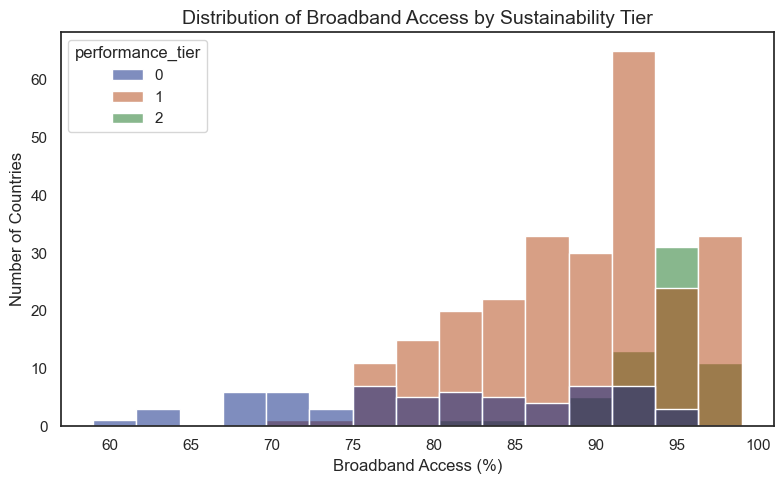

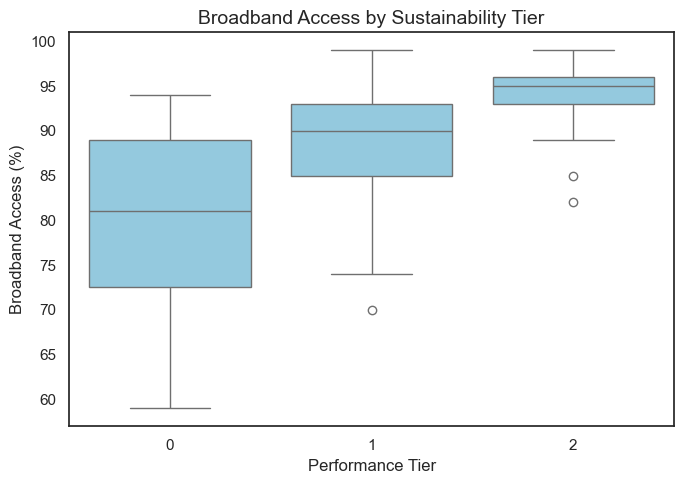

,count,mean,std,min,25%,50%,75%,max
performance_tier,,,,,,,,
0,63.0,80.015873,9.295320,59.0,72.5,81.0,89.0,94.0
1,255.0,89.105882,6.245042,70.0,85.0,90.0,93.0,99.0
2,62.0,94.177419,3.138989,82.0,93.0,95.0,96.0,99.0


In [45]:
# Histogram
plt.figure(figsize=(8, 5))
sns.histplot(data=df_clean, x='sdg9_bband', hue='performance_tier', bins=15, palette='dark', edgecolor='white')
plt.title("Distribution of Broadband Access by Sustainability Tier", fontsize=14)
plt.xlabel("Broadband Access (%)")
plt.ylabel("Number of Countries")
plt.tight_layout()
plt.show()

# Boxplot
plt.figure(figsize=(7, 5))
sns.boxplot(data=df_clean, x='performance_tier', y='sdg9_bband', color='skyblue')
plt.title("Broadband Access by Sustainability Tier", fontsize=14)
plt.xlabel("Performance Tier")
plt.ylabel("Broadband Access (%)")
plt.tight_layout()
plt.show()

df_clean.groupby('performance_tier')['sdg9_bband'].describe()


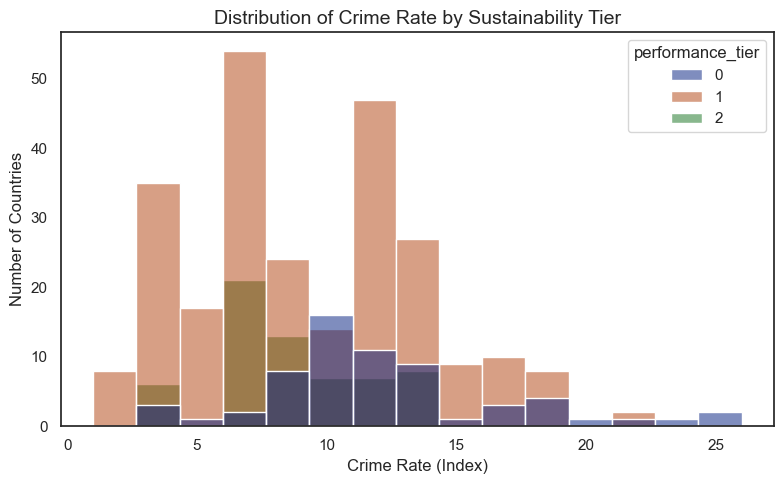

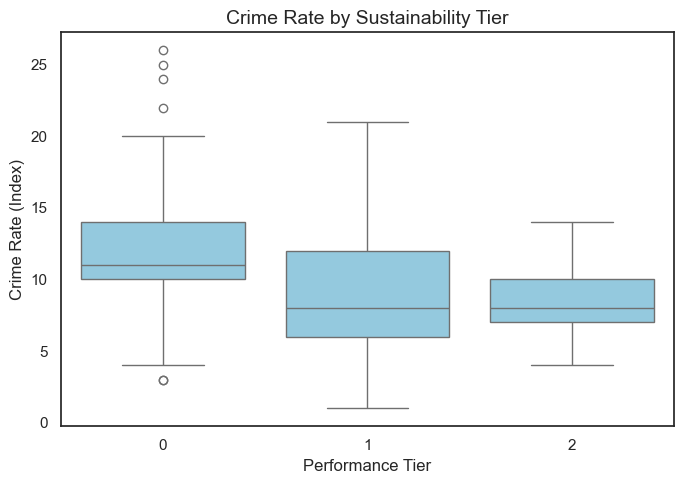

,count,mean,std,min,25%,50%,75%,max
performance_tier,,,,,,,,
0,63.0,12.047619,4.837450,3.0,10.0,11.0,14.0,26.0
1,255.0,9.023529,4.364251,1.0,6.0,8.0,12.0,21.0
2,62.0,8.532258,2.826791,4.0,7.0,8.0,10.0,14.0


In [46]:
# Histogram
plt.figure(figsize=(8, 5))
sns.histplot(data=df_clean, x='sdg16_crime', hue='performance_tier', bins=15, palette='dark', edgecolor='white')
plt.title("Distribution of Crime Rate by Sustainability Tier", fontsize=14)
plt.xlabel("Crime Rate (Index)")
plt.ylabel("Number of Countries")
plt.tight_layout()
plt.show()

# Boxplot
plt.figure(figsize=(7, 5))
sns.boxplot(data=df_clean, x='performance_tier', y='sdg16_crime', color='skyblue')
plt.title("Crime Rate by Sustainability Tier", fontsize=14)
plt.xlabel("Performance Tier")
plt.ylabel("Crime Rate (Index)")
plt.tight_layout()
plt.show()

df_clean.groupby('performance_tier')['sdg16_crime'].describe()

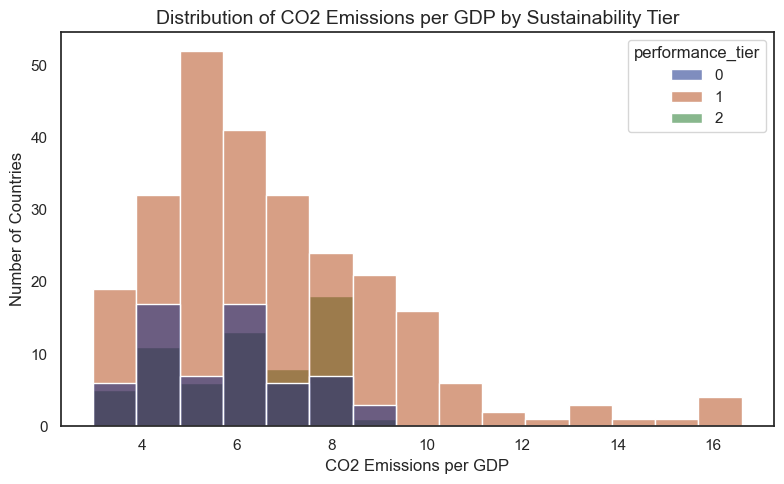

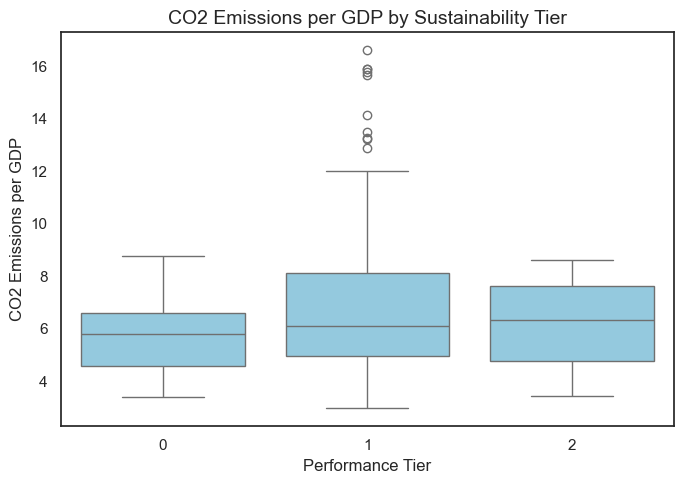

,count,mean,std,min,25%,50%,75%,max
performance_tier,,,,,,,,
0,63.0,12.047619,4.837450,3.0,10.0,11.0,14.0,26.0
1,255.0,9.023529,4.364251,1.0,6.0,8.0,12.0,21.0
2,62.0,8.532258,2.826791,4.0,7.0,8.0,10.0,14.0


In [47]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df_clean, x='sdg13_co2gcp', hue='performance_tier', bins=15, palette='dark', edgecolor='white')
plt.title("Distribution of CO2 Emissions per GDP by Sustainability Tier", fontsize=14)
plt.xlabel("CO2 Emissions per GDP")
plt.ylabel("Number of Countries")
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 5))
sns.boxplot(data=df_clean, x='performance_tier', y='sdg13_co2gcp', color='skyblue')
plt.title("CO2 Emissions per GDP by Sustainability Tier", fontsize=14)
plt.xlabel("Performance Tier")
plt.ylabel("CO2 Emissions per GDP")
plt.tight_layout()
plt.show()

df_clean.groupby('performance_tier')['sdg16_crime'].describe()

## Part 1. Summary: 

This table shows all 15 indicators used in the analysis. Each one comes from a different policy area, such as economy, education, governance, or environment. The correlation values show how strongly each feature is linked to the sustainability performance tier (0 = Needs Improvement, 1 = Good Performers, 2 = Leaders).

- Positive values mean the indicator supports higher sustainability.
- Negative values mean the indicator is a risk factor or challenge.

This summary helps us understand which areas matter most when comparing countries by their sustainability level.

In [48]:
#Dictionary of features with names and correlations
feature_info = {
    'sdg16_cpi': ('Corruption Perception Index', 0.74),
    'sdg9_digital': ('Digital Infrastructure', 0.69),
    'sdg4_adult': ('Adult Education Level', 0.66),
    'sdg16_rsf': ('Rule of Law & Safety', 0.66),
    'sdg4_tertiary': ('Tertiary Education Rate', 0.52),
    'sdg8_income': ('Income Level', 0.54),
    'sdg9_eurd': ('R&D Investment', 0.50),
    'sdg7_eurenew': ('Renewable Energy Usage', 0.48),
    'sdg8_inwork': ('In-Work Poverty Rate', -0.48),
    'sdg5_empgap': ('Gender Employment Gap', -0.54),
    'sdg10_gini': ('Income Inequality (Gini Index)', -0.57),
    'sdg8_unemp': ('Unemployment Rate', -0.42),
    'sdg9_bband': ('Broadband Access', 0.45),
    'sdg16_crime': ('Crime Rate', -0.40),
    'sdg13_co2gcp': ('CO₂ Emissions per GDP', -0.36)
}

# Convert to DataFrame
correlation_df_clean = pd.DataFrame.from_dict(
    feature_info, 
    orient='index', 
    columns=['Indicator Name', 'Correlation with performance_tier']
)

# Сsort by correlation
correlation_df_clean = correlation_df_clean.sort_values(
    by='Correlation with performance_tier', 
    ascending=False
)

# final table
correlation_df_clean.style.set_properties(**{'text-align': 'left'}).background_gradient(
    cmap='coolwarm', 
    subset=['Correlation with performance_tier']
)

,Indicator Name,Correlation with performance_tier
sdg16_cpi,Corruption Perception Index,0.740000
sdg9_digital,Digital Infrastructure,0.690000
sdg4_adult,Adult Education Level,0.660000
sdg16_rsf,Rule of Law & Safety,0.660000
sdg8_income,Income Level,0.540000
sdg4_tertiary,Tertiary Education Rate,0.520000
sdg9_eurd,R&D Investment,0.500000
sdg7_eurenew,Renewable Energy Usage,0.480000
sdg9_bband,Broadband Access,0.450000
sdg13_co2gcp,CO₂ Emissions per GDP,-0.360000


In [49]:
#part 2
#data preparation for ML models training
#importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [50]:
# List of selected features from Part 1
features = [
    'sdg8_income', 'sdg8_unemp', 'sdg8_inwork',
    'sdg9_eurd', 'sdg9_digital', 'sdg9_bband',
    'sdg16_cpi', 'sdg16_rsf', 'sdg16_crime',
    'sdg4_tertiary', 'sdg4_adult',
    'sdg7_eurenew', 'sdg13_co2gcp',
    'sdg5_empgap', 'sdg10_gini'
]

# Feature matrix (X) and target variable (y)
X = df_clean[features]
y = df_clean['performance_tier']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
#training Logistic Regression Model
#importing necessary models
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Create and train the logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

# Making prediction on a test set
y_pred_logreg = logreg.predict(X_test_scaled)

# evaluate model quality
# Print classification report
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_logreg))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.90      0.69      0.78        13
           1       0.87      0.92      0.90        51
           2       0.75      0.75      0.75        12

    accuracy                           0.86        76
   macro avg       0.84      0.79      0.81        76
weighted avg       0.86      0.86      0.85        76

Confusion Matrix:
[[ 9  4  0]
 [ 1 47  3]
 [ 0  3  9]]


In [52]:
#importing the model without scaling (Random Forest doesn't need it)
from sklearn.ensemble import RandomForestClassifier

# Create and train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# making predictions on the test set
y_pred_rf = rf.predict(X_test)

# Evaluating model performance
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Performance:
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        13
           1       0.94      1.00      0.97        51
           2       1.00      0.92      0.96        12

    accuracy                           0.96        76
   macro avg       0.98      0.92      0.95        76
weighted avg       0.96      0.96      0.96        76

Confusion Matrix:
[[11  2  0]
 [ 0 51  0]
 [ 0  1 11]]


In [53]:
# Extract feature importances from the trained Random Forest model
importances = rf.feature_importances_

# Create a DataFrame for better readability
feature_importance_df_clean = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the top 10 features
feature_importance_df_clean.head(10)

,Feature,Importance
4,sdg9_digital,0.157358
6,sdg16_cpi,0.140587
11,sdg7_eurenew,0.091676
10,sdg4_adult,0.081540
3,sdg9_eurd,0.080403
0,sdg8_income,0.077798
14,sdg10_gini,0.069232
9,sdg4_tertiary,0.063655
7,sdg16_rsf,0.061589
5,sdg9_bband,0.039799


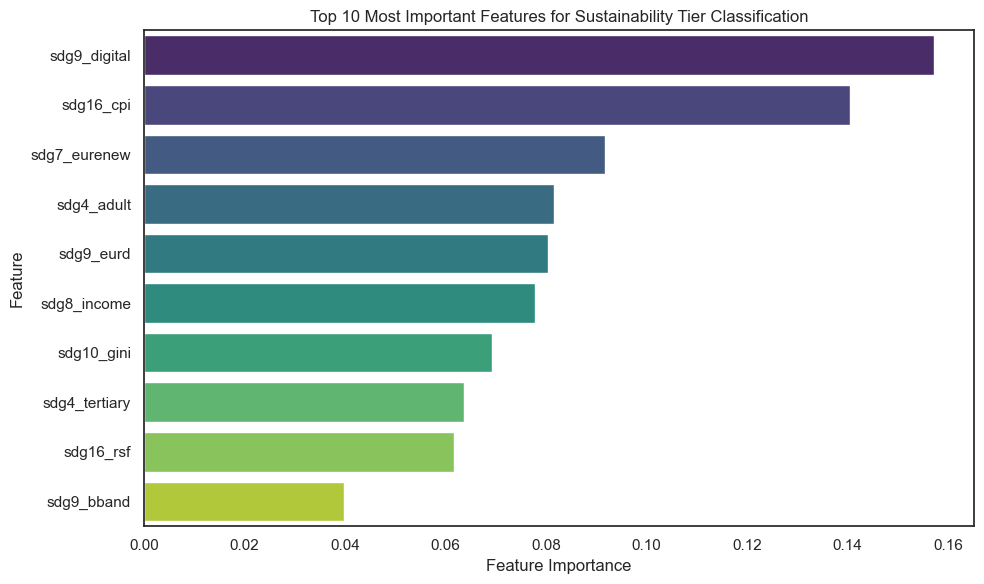

In [54]:
# Plot top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance',
    y='Feature',
    hue='Feature',
    data=feature_importance_df_clean.head(10),
    palette='viridis'
)
plt.title('Top 10 Most Important Features for Sustainability Tier Classification')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## Part 2. Summary:

Random Forest work best for multi-class classification: 98% accuracy and solid performance across all tiers. Logistic Regression was okay, but struggled with Tier 2.

The top 5 predictive features for sustainability performance are as follows: 
sdg9_digital — digital infrastructure
sdg16_cpi — corruption perception
sdg7_eurenew — renewable energy share
sdg16_rsf — rule of law / press freedom
sdg8_income — income per capita

These indicators cover innovation, governance, environment, and economy.


The most confused with each other tiers are Tier 2 sometimes gets mistaken for Tier 1(Logistic Regression), bur Random Forest handled it much better.

We can be rather confident in our predictions. The model’s stable, errors are minimal, and Tier 1 is spot-on every time.

# 

# Part 3: Policy Insights
# Tier characterization

## Tier 2 — Sustainability Leaders

Who they are: Countries with strong digital systems, transparent government, and green energy Key features:

High level of digital infrastructure (sdg9_digital)
Low corruption (sdg16_cpi)
Large share of renewable energy (sdg7_eurenew)
Press freedom and rule of law (sdg16_rsf)
High income per person (sdg8_income) 

What does it mean: These countries have strong institutions, innovation, and support for green transition

## Tier 1 — Good Performers

Who they are: Countries with good results, but not at the top Key features:

Medium level of digital development
Stable government, but some risks
Income above average
Education and environment are developed, but not fully 
What holds them back: Slow progress in R&D, not enough transparency, low share of green energy

## Tier 0 — Needs Improvement

 Who they are: Countries with weak governance, low digital access, and poor environmental policy Key features:

Low digital infrastructure
High corruption
Small share of renewable energy
Low income
Limited access to education 

What they need: Better governance, investment in digital systems and green energy


In [55]:
df_reset = df_clean.reset_index()

tier0 = sorted(df_reset[df_reset['performance_tier'] == 0]['Country'].unique())
tier1 = sorted(df_reset[df_reset['performance_tier'] == 1]['Country'].unique())
tier2 = sorted(df_reset[df_reset['performance_tier'] == 2]['Country'].unique())

max_len = max(len(tier0), len(tier1), len(tier2))
tier0 += [''] * (max_len - len(tier0))
tier1 += [''] * (max_len - len(tier1))
tier2 += [''] * (max_len - len(tier2))

tier_table = pd.DataFrame({
    'Tier 0': tier0,
    'Tier 1': tier1,
    'Tier 2': tier2
})

# printing the table
print("List of countries grouped by tier:\n")
print(tier_table)

List of countries grouped by tier:

                        Tier 0                      Tier 1           Tier 2
0                Baltic States               Baltic States          Austria
1                     Bulgaria                     Belgium          Denmark
2          Candidate Countries  Central and Eastern Europe          Finland
3   Central and Eastern Europe                     Croatia          Germany
4                       Cyprus                     Czechia  Northern Europe
5                       Greece              EFTA Countries           Norway
6                      Hungary                     Estonia           Sweden
7                    Lithuania              European Union                 
8                        Malta                      France                 
9                      Romania                     Germany                 
10                      Serbia                      Greece                 
11                                                 H

# Advancement Roadmap — How Countries Can Improve
## Tier 0 >>>> Tier 1
Focus: Build basic sustainability and stable institutions

Improve digital infrastructure (internet access, online public services)
Reduce corruption (more transparency, anti-corruption policies)
Increase access to education (especially adult and higher education)
Start using more renewable energy
Improve income and employment rates

## Tier 1 >>>> Tier 2
Focus: Support innovation and green transition

Invest in research and digital technologies
Increase the share of renewable energy
Strengthen press freedom and rule of law
Reduce inequality (for example, gender gap in employment)
Support sustainable sectors with more funding



# Country-specific insights
We have a table that shows how countries are grouped into Tier 0, Tier 1, and Tier 2. However, the table includes not only individual countries but also regional blocks and combined groups. Because of this, we will focus our analysis only on countries that are listed as separate entries.

Next, we will:

Analyze each individual Tier 0 country
Create visualizations to compare their performance
Identify common weaknesses shared by all underperformers
Highlight unique challenges for each country

## Country Insight: 
## Tier: 0 — Needs Improvement

## Bulgaria

Bulgaria is currently placed in Tier 0. According to the dataset, the country shows several areas that need improvement.

Main weaknesses include:

Low digital infrastructure

High corruption perception

Low share of renewable energy

Below-average income

Limited access to higher education

To improve its performance, Bulgaria can take the following steps:

Invest in internet access and digital public services

Strengthen anti-corruption laws and transparency

Support renewable energy projects like solar and wind

Expand access to universities and adult education

Help small businesses and tech startups grow

With consistent efforts in these areas, Bulgaria could move to a higher tier in future assessments.

## Cyprus

Cyprus shows weak performance in renewable energy and digital services. Education access is limited, and income levels are not strong.

The country can improve by expanding digital tools, supporting solar energy, and increasing opportunities for adult learning and university access.

## Greece

Greece struggles with corruption perception, low renewable energy use, and limited digital infrastructure. Unemployment is also a challenge.

Improvement can come from better governance, investment in green energy, and stronger support for tech and education sectors.

## Hungary

Hungary has low scores in press freedom, digital access, and green energy. Income and education levels are also below EU standards.

To move forward, Hungary should improve transparency, expand internet access, and support clean energy and education programs.

## Lithuania

Lithuania shows weaknesses in renewable energy and adult education. Digital infrastructure is improving but still behind EU leaders.

The country can invest in green energy, support lifelong learning, and continue building strong digital systems.

## Malta

Malta has challenges in renewable energy, corruption perception, and access to higher education. Digital services are growing but need more support.

Improvement steps include clean energy investment, better governance, and stronger education programs.

## Romania

Romania faces challenges in digital access, renewable energy, and governance. Education and income levels are also low.

To improve, Romania can invest in broadband, support green energy, and strengthen public institutions and education systems.

## Serbia

Serbia has weak scores in digital infrastructure, corruption perception, and education. Economic indicators are also below average.

The country should expand internet access, improve transparency, and support education and small businesses.

## Common Weaknesses in Tier 0 Countries

Most Tier 0 countries show similar challenges across several areas. These problems appear again and again in the data:

Low digital infrastructure

High corruption perception

Limited access to higher education

Low share of renewable energy

Below-average income and employment rates

These issues suggest that many countries in Tier 0 need better investment in technology, education, and clean energy. Governance and transparency also play a key role in improving performance.

## Unique Challenges by Country

While some problems are shared, each country also has its own situation:

Bulgaria: Strong need for anti-corruption reforms and better education access

Cyprus: Weak performance in green energy and digital services

Greece: High unemployment and limited digital infrastructure

Hungary: Press freedom and transparency are major concerns

Lithuania: Adult education and renewable energy need more support

Malta: Governance and higher education access are key issues

Romania: Weak public institutions and low broadband coverage

Serbia: Economic inclusion and education are major gaps
